Epoch 10/500, Loss: 0.6869
Epoch 20/500, Loss: 0.6749
Epoch 30/500, Loss: 0.6592
Epoch 40/500, Loss: 0.6373
Epoch 50/500, Loss: 0.6096
Epoch 60/500, Loss: 0.5787
Epoch 70/500, Loss: 0.5476
Epoch 80/500, Loss: 0.5167
Epoch 90/500, Loss: 0.4848
Epoch 100/500, Loss: 0.4530
Epoch 110/500, Loss: 0.4222
Epoch 120/500, Loss: 0.3920
Epoch 130/500, Loss: 0.3624
Epoch 140/500, Loss: 0.3336
Epoch 150/500, Loss: 0.3058
Epoch 160/500, Loss: 0.2791
Epoch 170/500, Loss: 0.2542
Epoch 180/500, Loss: 0.2308
Epoch 190/500, Loss: 0.2090
Epoch 200/500, Loss: 0.1892
Epoch 210/500, Loss: 0.1711
Epoch 220/500, Loss: 0.1550
Epoch 230/500, Loss: 0.1408
Epoch 240/500, Loss: 0.1280
Epoch 250/500, Loss: 0.1162
Epoch 260/500, Loss: 0.1051
Epoch 270/500, Loss: 0.0943
Epoch 280/500, Loss: 0.0827
Epoch 290/500, Loss: 0.0710
Epoch 300/500, Loss: 0.0615
Epoch 310/500, Loss: 0.0541
Epoch 320/500, Loss: 0.0480
Epoch 330/500, Loss: 0.0430
Epoch 340/500, Loss: 0.0387
Epoch 350/500, Loss: 0.0351
Epoch 360/500, Loss: 0.0320
E

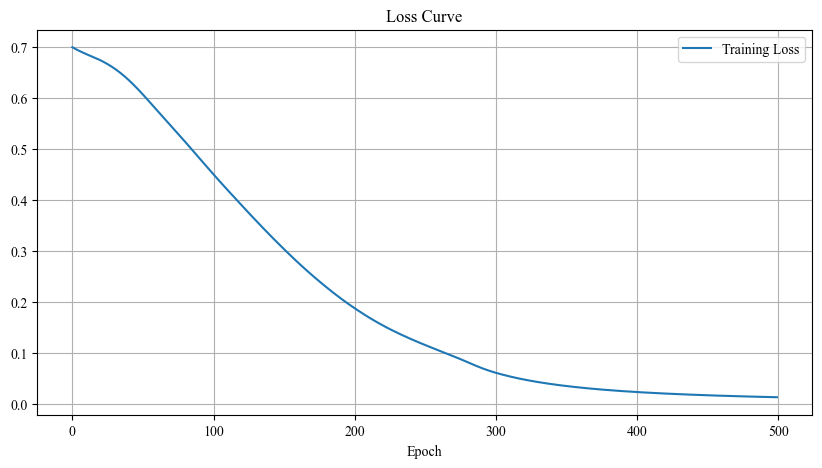

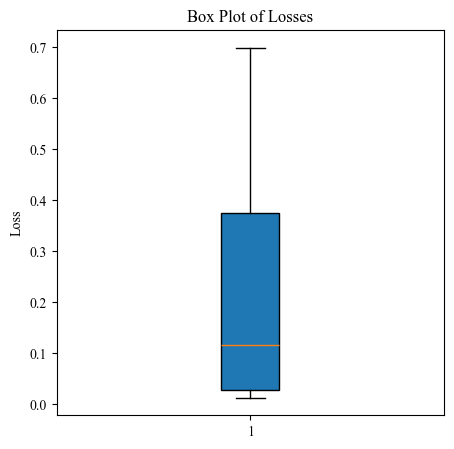

Accuracy: 0.7209
Model parameters saved to /Users/curryyang/code/2024_MCM_C_UESTC/modle/set_predictor_model_soccer.pth
SetPredictor(
  (fc1): Linear(in_features=24, out_features=48, bias=True)
  (fc2): Linear(in_features=48, out_features=24, bias=True)
  (fc3): Linear(in_features=24, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
[[ 1.25928700e-01 -2.18831167e-01  2.65182734e-01  1.82296485e-01
   3.74852031e-01 -4.23622578e-01  3.25489461e-01  1.50728315e-01
   2.26725921e-01  7.92023465e-02  4.19733852e-01 -1.71180636e-01
   3.13008457e-01 -1.25445113e-01 -2.22495258e-01  2.46159419e-01
   2.84467816e-01  6.54319441e-03 -1.70645311e-01  7.62131810e-02
  -1.72855631e-01 -4.43535447e-01 -1.76534086e-01  1.97032895e-02]
 [-2.31730565e-01  9.94214695e-03 -6.22220278e-01  3.12445819e-01
  -1.53118759e-01 -2.42994446e-02 -6.73718452e-02 -2.27963507e-01
   3.95673484e-01  2.43237928e-01  1.91400796e-01 -3.61675560e-01
   6.53679520e-02  1.80525362e-01  1.42420709e-01 -1.52979000e-02
  

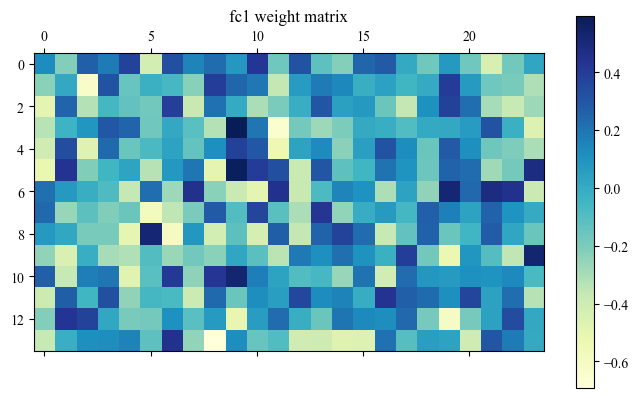

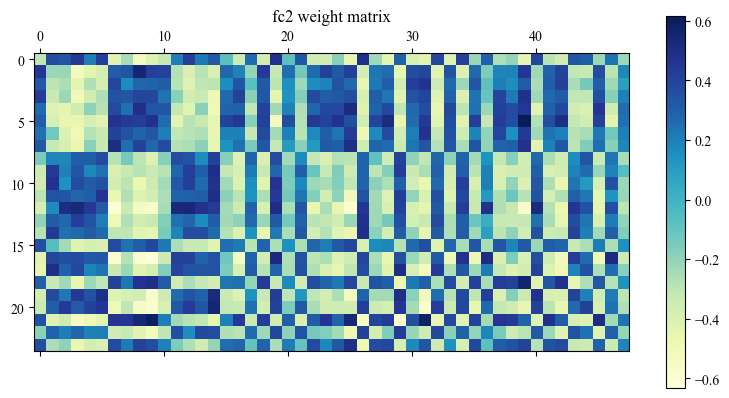

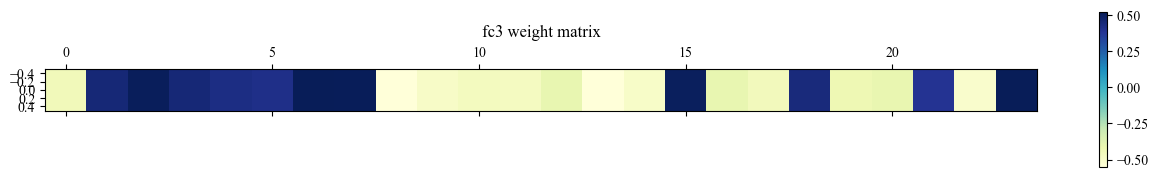

In [7]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 加载数据
data = pd.read_csv('/Users/curryyang/code/2024_MCM_C_UESTC/processed_datasets/soccer_data_shuffled.csv')

# 选择特征和预处理
features = data[['shots_ontarget_win', 'shots_ontarget_lost', 'shots_offtarget_win','shots_offtarget_lost', 'shotsblocked_win', 'shotsblocked_lost', 'chances2score_win', 'chances2score_lost','drib_success_win','drib_success_lost','drib_unsuccess_win','drib_unsuccess_lost','keypasses_win','keypasses_lost','owngoals_win','owngoals_lost','dangmistakes_win','dangmistakes_lost','ycards_win','ycards_lost','rcards_win','rcards_lost','interceptions_win','interceptions_lost']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# 构造每个set的胜者标签（简化逻辑）
# 假设set的胜者是在该set中得分更多的玩家
# 注意：这里的逻辑可能需要根据实际数据和规则进行调整
set_winner = (data['p1'] == 1).astype(int)

# 划分数据集（这里我们简化，直接使用行号进行划分）
X_train, X_test = features_scaled[:200], features_scaled[200:]
y_train, y_test = set_winner[:200], set_winner[200:]

# 将NumPy数组转换为Tensor
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# 神经网络定义
class SetPredictor(nn.Module):
    def __init__(self):
        super(SetPredictor, self).__init__()
        self.fc1 = nn.Linear(24, 48)
        self.fc2 = nn.Linear(48, 24)
        self.fc3 = nn.Linear(24, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

# 实例化模型、定义损失函数和优化器
model = SetPredictor()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 训练模型
num_epochs = 500
epoch_loss = []
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs.squeeze(), y_train_tensor)
    loss.backward()
    optimizer.step()
    epoch_loss.append(loss.item())



    if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')
plt.rcParams['font.family'] = 'Times New Roman'
plt.figure(figsize=(10, 5))
plt.plot(epoch_loss, label='Training Loss')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(5, 5))
plt.boxplot(epoch_loss, vert=True, patch_artist=True)
plt.title('Box Plot of Losses')
plt.ylabel('Loss')
plt.show()

# 简单评估模型
model.eval()
with torch.no_grad():
    outputs0 = model(X_train_tensor).squeeze()
    outputs = model(X_test_tensor).squeeze()
    predictions = (outputs >= 0.5).float()
    accuracy = (predictions == y_test_tensor).float().mean()
    print(f'Accuracy: {accuracy:.4f}')
features_array = np.append(X_train_tensor.numpy(), X_test_tensor.numpy(), axis=0)
predictions_array = np.append(outputs0.numpy(), outputs.numpy(), axis=0)
export_data = np.hstack((features_array, predictions_array.reshape(-1, 1)))
features_original = scaler.inverse_transform(features_array)
export_df = pd.DataFrame(features_original, columns=['shots_ontarget_win', 'shots_ontarget_lost', 'shots_offtarget_win','shots_offtarget_lost', 'shotsblocked_win', 'shotsblocked_lost', 'chances2score_win', 'chances2score_lost','drib_success_win','drib_success_lost','drib_unsuccess_win','drib_unsuccess_lost','keypasses_win','keypasses_lost','owngoals_win','owngoals_lost','dangmistakes_win','dangmistakes_lost','ycards_win','ycards_lost','rcards_win','rcards_lost','interceptions_win','interceptions_lost'])
export_df['Predicted_Value'] = predictions_array
export_df['fixture_id'] = data['fixture_id']

# 导出DataFrame为CSV文件
export_df.to_csv('/Users/curryyang/code/2024_MCM_C_UESTC/exported_datasets/exported_soccer.csv', index=False)


# 模型保存路径
model_path = '/Users/curryyang/code/2024_MCM_C_UESTC/modle/set_predictor_model_soccer.pth'

# 保存模型的状态字典
torch.save(model.state_dict(), model_path)

print(f'Model parameters saved to {model_path}')

import torch
import torchvision.models as models

# 加载权重
model.load_state_dict(torch.load('/Users/curryyang/code/2024_MCM_C_UESTC/modle/set_predictor_model_soccer.pth'))

model.eval()

print(model)

import matplotlib.pyplot as plt

weights1 = model.fc1.weight.data.numpy()
weights2 = model.fc2.weight.data.numpy()
weights3 = model.fc3.weight.data.numpy()

# 选择权重的一个子集进行可视化
weights_subset1 = weights1[:14]
weights_subset2 = weights2[:28]
weights_subset3 = weights3[:14]
print(weights_subset1)
print(weights_subset2)
print(weights_subset3)
plt.matshow(weights_subset1, cmap='YlGnBu')  # 选择一个颜色映射
plt.colorbar() # 显示颜色条
plt.title('fc1 weight matrix')
plt.matshow(weights_subset2, cmap='YlGnBu') 
plt.colorbar() 
plt.title('fc2 weight matrix')
plt.matshow(weights_subset3, cmap='YlGnBu') 
plt.colorbar() 
plt.title('fc3 weight matrix')

# 显示图像
plt.show()

